# 문제2

In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
%matplotlib inline
matplotlib.rc('font', family = 'NanumGothic')

In [3]:
df1 = pd.read_csv('Concrete.csv')
df1_y = df1['CONCRETE_COMPRESSIVE_STRENGTH']
df1_x = df1.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis = 1, inplace = False)

In [4]:
df1_train_x, df1_test_x, df1_train_y, df1_test_y = train_test_split(df1_x, df1_y, test_size = 0.3, random_state = 777)
print(f'train_x:{df1_train_x.shape}\ttrain_y:{df1_train_y.shape}\ntest_x:{df1_test_x.shape}\ttest:{df1_test_y.shape}')

train_x:(721, 8)	train_y:(721,)
test_x:(309, 8)	test:(309,)


In [5]:
tree_uncustomized = DecisionTreeRegressor(random_state = 777)
tree_uncustomized.fit(df1_train_x, df1_train_y)

print(f'Score on training set: {tree_uncustomized.score(df1_train_x, df1_train_y)}')
print(f'Score on test set: {tree_uncustomized.score(df1_test_x, df1_test_y)}')

Score on training set: 0.9991852725218725
Score on test set: 0.8413244234344935


In [6]:
df1_train_x, df1_validation_x, df1_train_y, df1_validation_y = train_test_split(df1_train_x, df1_train_y, test_size = 0.4, random_state = 777)

#df1_train_x: df1_validation_x: df_test_x = (약) 0.4: 0.3: 0.3
#df1_train_y: df1_validation_y: df_test_y = (약) 0.4: 0.3: 0.3

# 이미 모델의 설명력은 0.84로 상당히 높지만, 더 나은 모델을 찾을 수 있는지 확인한다.

In [7]:
train_score = list()
test_score = list()

para_leaves = [n_leaf for n_leaf in range(1, 20)]

for para_leaf in para_leaves:
    tree = DecisionTreeRegressor(random_state=777, min_samples_leaf=para_leaf)
    tree.fit(df1_train_x, df1_train_y)
    train_score.append(tree.score(df1_train_x, df1_train_y))
    test_score.append(tree.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Leaves'] = para_leaves
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score

df_score.round(3)

Leaves  TrainScore  ValidationScore
0        1       0.999            0.731
1        2       0.980            0.729
2        3       0.960            0.726
3        4       0.933            0.769
4        5       0.914            0.772
5        6       0.896            0.778
6        7       0.879            0.788
7        8       0.869            0.772
8        9       0.863            0.774
9       10       0.853            0.759
10      11       0.847            0.750
11      12       0.834            0.748
12      13       0.818            0.733
13      14       0.797            0.719
14      15       0.781            0.718
15      16       0.763            0.691
16      17       0.759            0.684
17      18       0.758            0.684
18      19       0.754            0.676

In [8]:
train_score = list()
test_score = list()

para_leaves = [n_leaf for n_leaf in range(1, 20)]

for para_leaf in para_leaves:
    tree = DecisionTreeRegressor(criterion='mae', random_state=777, min_samples_leaf=para_leaf)
    tree.fit(df1_train_x, df1_train_y)
    train_score.append(tree.score(df1_train_x, df1_train_y))
    test_score.append(tree.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Leaves'] = para_leaves
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score

df_score.round(3)

Leaves  TrainScore  ValidationScore
0        1       0.999            0.784
1        2       0.954            0.771
2        3       0.916            0.773
3        4       0.896            0.742
4        5       0.881            0.733
5        6       0.877            0.750
6        7       0.862            0.745
7        8       0.844            0.757
8        9       0.832            0.774
9       10       0.820            0.761
10      11       0.781            0.724
11      12       0.740            0.660
12      13       0.715            0.639
13      14       0.703            0.642
14      15       0.701            0.641
15      16       0.694            0.627
16      17       0.687            0.618
17      18       0.686            0.600
18      19       0.684            0.606

# Leaves == 7까지 설명력의 상승세가 유지된다. 따라서 Leaves는 7로 유지한다.

In [9]:
train_score = list()
test_score = list()

n_splits = [n_split * 2 for n_split in range(1, 20)]

for n_split in n_splits:
    tree = DecisionTreeRegressor(random_state=777, min_samples_leaf=7,  min_samples_split=n_split)
    tree.fit(df1_train_x, df1_train_y)
    train_score.append(tree.score(df1_train_x, df1_train_y))
    test_score.append(tree.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Splits'] = n_splits
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score
df_score.round(3)

Splits  TrainScore  ValidationScore
0        2       0.879            0.788
1        4       0.879            0.788
2        6       0.879            0.788
3        8       0.879            0.788
4       10       0.879            0.788
5       12       0.879            0.788
6       14       0.879            0.788
7       16       0.873            0.787
8       18       0.869            0.785
9       20       0.859            0.773
10      22       0.855            0.767
11      24       0.855            0.767
12      26       0.849            0.770
13      28       0.827            0.755
14      30       0.817            0.729
15      32       0.778            0.704
16      34       0.777            0.703
17      36       0.777            0.703
18      38       0.771            0.699

#  Splits == 2일때 가장 높은 설명력을 보이므로, Split을 2로 설정한다.

In [10]:
train_score = list()
test_score = list()

depths = [depth for depth in range(1, 15)]

for depth in depths:
    tree = DecisionTreeRegressor(random_state=777, min_samples_leaf=7, min_samples_split=2, max_depth=depth)
    tree.fit(df1_train_x, df1_train_y)
    train_score.append(tree.score(df1_train_x, df1_train_y))
    test_score.append(tree.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Depth'] = depths
df_score['TrainScore'] = train_score
df_score['TestScore'] = test_score

In [11]:
df_score.round(3)

Depth  TrainScore  TestScore
0       1       0.267      0.162
1       2       0.453      0.358
2       3       0.609      0.573
3       4       0.735      0.661
4       5       0.820      0.741
5       6       0.857      0.782
6       7       0.872      0.785
7       8       0.876      0.786
8       9       0.879      0.788
9      10       0.879      0.788
10     11       0.879      0.788
11     12       0.879      0.788
12     13       0.879      0.788
13     14       0.879      0.788

# Depth==9에서 가장 높은 설명력을 보이므로 이를 채택한다.
# Leaves==7, Split ==2, Depth ==9로 세팅하고 테스트 데이터로 이를 검정한다.

In [12]:
tree_final = DecisionTreeRegressor(random_state=777, min_samples_leaf=7, min_samples_split=2, max_depth=9)
tree_final.fit(df1_train_x, df1_train_y)
print(f'Final Score: {tree_final.score(df1_test_x, df1_test_y)}')

Final Score: 0.763800196680982


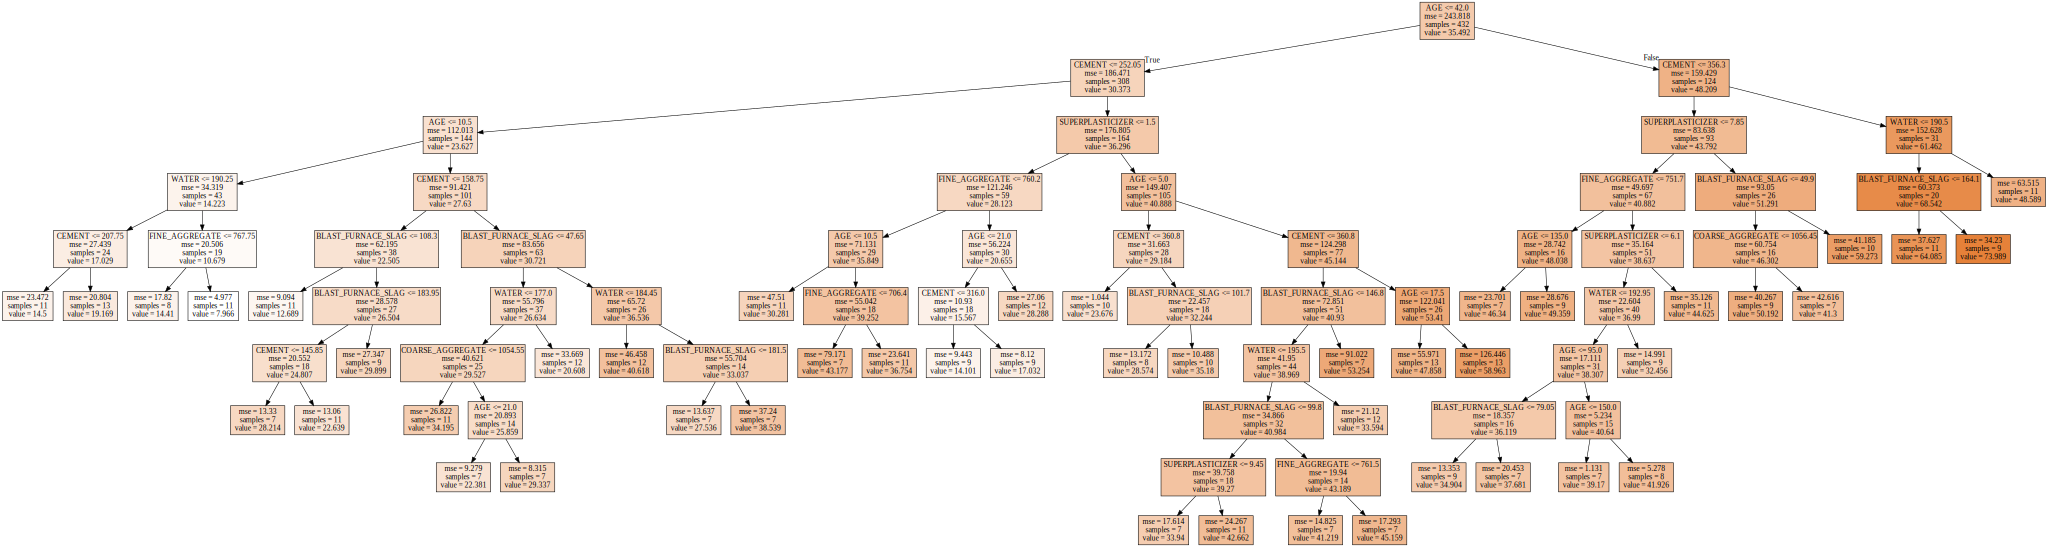

In [13]:
feature_names = df1_train_x.columns
export_graphviz(tree_final, out_file = 'tree_final.dot', feature_names = feature_names, impurity = True, filled = True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [14]:
df1_importance = pd.DataFrame()
df1_importance['Feature'] = feature_names
df1_importance['Importance'] = tree_final.feature_importances_

df1_importance.sort_values('Importance', ascending=False, inplace = True)
df1_importance.round(3)

Feature  Importance
7                 AGE       0.450
0              CEMENT       0.266
4    SUPERPLASTICIZER       0.097
1  BLAST_FURNACE_SLAG       0.072
3               WATER       0.054
6      FINE_AGGREGATE       0.053
5    COARSE_AGGREGATE       0.008
2             FLY_ASH       0.000

Text(0, 0.5, '변수')

/home/hyuck/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


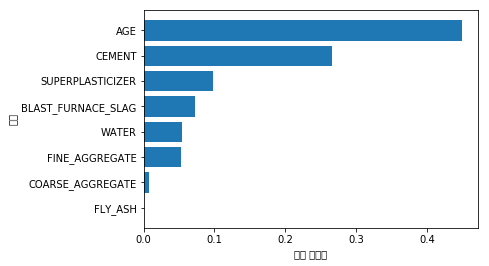

In [15]:
coordinates = range(len(df1_importance))
df1_importance.sort_values('Importance', ascending = True, inplace = True)
plt.barh(y = coordinates, width = df1_importance['Importance'])
plt.yticks(coordinates, df1_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [16]:
n_splits = n_splits[:-3]
n_splits
# 아래의 Grid Search시에 시간이 너무 오래걸려서 Splits의 element 수를 임의로 조금 줄입니다.

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]

In [17]:
estimator = DecisionTreeRegressor()
para_depth = depths
para_split = n_splits
para_leaf = para_leaves
param_grid = {'criterion':['mae'], 'max_features':['auto', 'sqrt', 'log2'],
             'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs = -1)
grid_dt.fit(df1_train_x, df1_train_y)

print(f'best score: {grid_dt.best_score_.round(3)}')

/home/hyuck/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best score: 0.702


In [18]:
grid_dt

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [19]:
tree_final = DecisionTreeRegressor(criterion='mae', random_state=777, min_samples_leaf=7, min_samples_split=7, max_depth=8)
tree_final.fit(df1_train_x, df1_train_y)
print(f'Final Score: {tree_final.score(df1_test_x, df1_test_y)}')
tree_final

Final Score: 0.7685983762736645


DecisionTreeRegressor(criterion='mae', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=7,
           min_samples_split=7, min_weight_fraction_leaf=0.0,
           presort=False, random_state=777, splitter='best')

In [20]:
tree_final = DecisionTreeRegressor(criterion='mse', random_state=777, min_samples_leaf=7, min_samples_split=7, max_depth=8)
tree_final.fit(df1_train_x, df1_train_y)
print(f'Final Score: {tree_final.score(df1_test_x, df1_test_y)}')
tree_final

Final Score: 0.7622204220438155


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=7,
           min_samples_split=7, min_weight_fraction_leaf=0.0,
           presort=False, random_state=777, splitter='best')

In [21]:
predict = tree_final.predict(df1_test_x)
# predict = pd.DataFrame({'Predict':predict, 'ActualValue':df1_test_y})

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(predict, df1_test_y)
mse = mean_squared_error(predict, df1_test_y)
print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')

NameError: name 'predict' is not defined

# MAE는 absolute value이므로, MSE보다 훨씬 낮은 수치를 보인다. 하지만 스코어로 계산해주는 score 메소드를 사용했을 때, mse가 좀 더 나은 스코어를 보여주는 것을 알 수 있다.

# 문제3

In [4]:
from sklearn.ensemble import RandomForestRegressor


In [24]:
rf_uncustomized = RandomForestRegressor(random_state = 777)
rf_uncustomized.fit(df1_train_x, df1_train_y)
print(f'Score on training set: {rf_uncustomized.score(df1_train_x, df1_train_y)}')
print(f'Score on test set: {rf_uncustomized.score(df1_test_x, df1_test_y)}')

Score on training set: 0.9729434300509446
Score on test set: 0.849758784523105


/home/hyuck/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
train_score = list()
test_score = list()

para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for para_tree in para_n_tree:
    rf = RandomForestRegressor(n_estimators = para_tree, random_state = 777)
    rf.fit(df1_train_x, df1_train_y)
    train_score.append(rf.score(df1_train_x, df1_train_y))
    test_score.append(rf.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Trees'] = para_n_tree
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score

In [26]:
df_score.round(3)

Trees  TrainScore  ValidationScore
0     10       0.973            0.862
1     20       0.979            0.868
2     30       0.980            0.871
3     40       0.981            0.872
4     50       0.981            0.871
5     60       0.981            0.868
6     70       0.982            0.870
7     80       0.981            0.870
8     90       0.982            0.872
9    100       0.982            0.872

# Trees == 40일 때, 가장 높은 설명력을 보여준다.

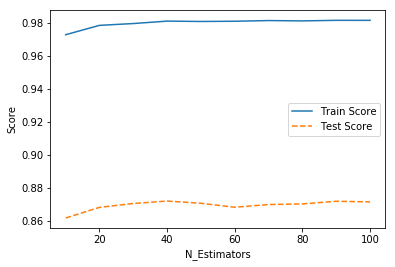

In [27]:
plt.plot(para_n_tree, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.ylabel('Score')
plt.xlabel('N_Estimators')
plt.legend()

In [28]:
train_score = list()
test_score = list()

para_leaves = [n_leaf * 1 for n_leaf in range(1, 21)]

for para_leaf in para_leaves:
    rf = RandomForestRegressor(n_estimators = 40, random_state = 777, min_samples_leaf=para_leaf)
    rf.fit(df1_train_x, df1_train_y)
    train_score.append(rf.score(df1_train_x, df1_train_y))
    test_score.append(rf.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Leaf'] = para_leaves
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score
df_score.round(3)

Leaf  TrainScore  ValidationScore
0      1       0.981            0.872
1      2       0.966            0.867
2      3       0.949            0.860
3      4       0.934            0.852
4      5       0.920            0.843
5      6       0.905            0.835
6      7       0.892            0.828
7      8       0.879            0.820
8      9       0.868            0.812
9     10       0.858            0.803
10    11       0.847            0.791
11    12       0.835            0.783
12    13       0.826            0.775
13    14       0.816            0.767
14    15       0.806            0.759
15    16       0.799            0.754
16    17       0.791            0.747
17    18       0.783            0.741
18    19       0.772            0.731
19    20       0.763            0.725

# 잎사귀 노드의 최소 자료 수가 적을 수록 (Leaves == 1) 높은 설명력을 보인다.

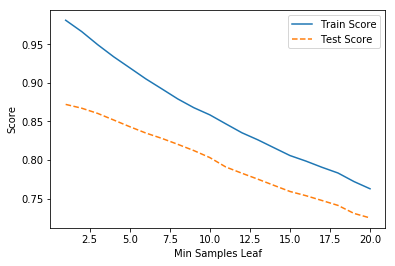

In [29]:
plt.plot(para_leaves, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaves, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('Score')
plt.xlabel('Min Samples Leaf')
plt.legend()

In [30]:
train_score = list()
test_score = list()

para_splits = [n_split * 2 for n_split in range(1, 21)]

for para_split in para_splits:
    rf = RandomForestRegressor(n_estimators = 40, random_state = 777, min_samples_leaf=1, min_samples_split=para_split)
    rf.fit(df1_train_x, df1_train_y)
    train_score.append(rf.score(df1_train_x, df1_train_y))
    test_score.append(rf.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Splits'] = para_splits
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score
df_score.round(3)

Splits  TrainScore  ValidationScore
0        2       0.981            0.872
1        4       0.975            0.870
2        6       0.966            0.869
3        8       0.956            0.864
4       10       0.945            0.859
5       12       0.935            0.853
6       14       0.924            0.848
7       16       0.911            0.842
8       18       0.900            0.837
9       20       0.889            0.829
10      22       0.877            0.818
11      24       0.866            0.809
12      26       0.854            0.801
13      28       0.843            0.794
14      30       0.838            0.787
15      32       0.831            0.780
16      34       0.824            0.775
17      36       0.814            0.766
18      38       0.806            0.756
19      40       0.801            0.752

# 해당 샘플은 Split(분리 노드의 최소 자료수)가 적을 수록 높은 설명력을 보인다.

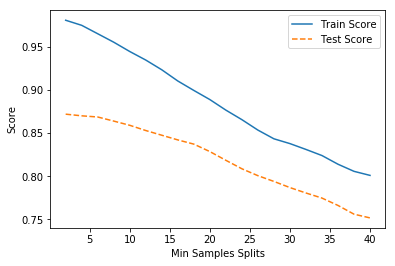

In [31]:
plt.plot(para_splits, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_splits, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('Score')
plt.xlabel('Min Samples Splits')
plt.legend()

In [32]:
train_score = list()
test_score = list()

para_depths = [depth for depth in range(1, 15)]

for para_depth in para_depths:
    rf = RandomForestRegressor(n_estimators = 40, random_state = 777, min_samples_leaf=1, min_samples_split=2, max_depth=para_depth)
    rf.fit(df1_train_x, df1_train_y)
    train_score.append(rf.score(df1_train_x, df1_train_y))
    test_score.append(rf.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['MaxDepth'] = para_depths
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score
df_score.round(3)

MaxDepth  TrainScore  ValidationScore
0          1       0.314            0.231
1          2       0.558            0.481
2          3       0.723            0.662
3          4       0.821            0.765
4          5       0.888            0.818
5          6       0.931            0.848
6          7       0.955            0.861
7          8       0.968            0.867
8          9       0.975            0.867
9         10       0.978            0.870
10        11       0.980            0.872
11        12       0.981            0.874
12        13       0.981            0.873
13        14       0.981            0.874

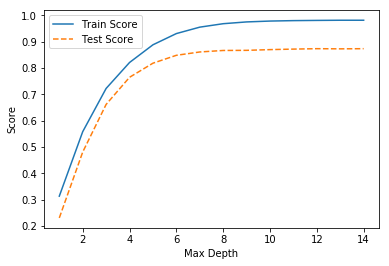

In [33]:
plt.plot(para_depths, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depths, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('Score')
plt.xlabel('Max Depth')
plt.legend()

# MaxDepth == 12에서 가장 설명력이 높은 것을 알 수 있다.

In [34]:
rf_final = RandomForestRegressor(n_estimators = 40, random_state = 777, min_samples_leaf=1, min_samples_split=2, max_depth=12,)
rf_final.fit(df1_train_x, df1_train_y)

print(f'Score on training set: {rf_final.score(df1_train_x, df1_train_y)}')
print(f'Score on test set: {rf_final.score(df1_test_x, df1_test_y)}')
rf_final

Score on training set: 0.9808585179265209
Score on test set: 0.8707924126882853


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=777, verbose=0, warm_start=False)

In [35]:
rf_final = RandomForestRegressor(n_estimators = 40, random_state = 777, min_samples_leaf=1, min_samples_split=2, max_depth=12,criterion='mae')
rf_final.fit(df1_train_x, df1_train_y)

print(f'Score on training set: {rf_final.score(df1_train_x, df1_train_y)}')
print(f'Score on test set: {rf_final.score(df1_test_x, df1_test_y)}')
rf_final

Score on training set: 0.9767647185463533
Score on test set: 0.8783021960622808


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=777, verbose=0, warm_start=False)

In [36]:
predict = rf_final.predict(df1_test_x)
print(f'mse:{mean_squared_error(predict, df1_test_y)}')
print(f'mae:{mean_absolute_error(predict, df1_test_y)}')

mse:37.20531801542273
mae:4.453654126213593


# 문제 2와 마찬가지로 MAE와 MSE는 단순히 수치로 비교할 수 없다. 하지만 MSE 보다 MAE에서 0.7% 정도 조금 더 나은 설명력(score)을 보이므로, 해당 분석에서는 MAE를 사용한다.

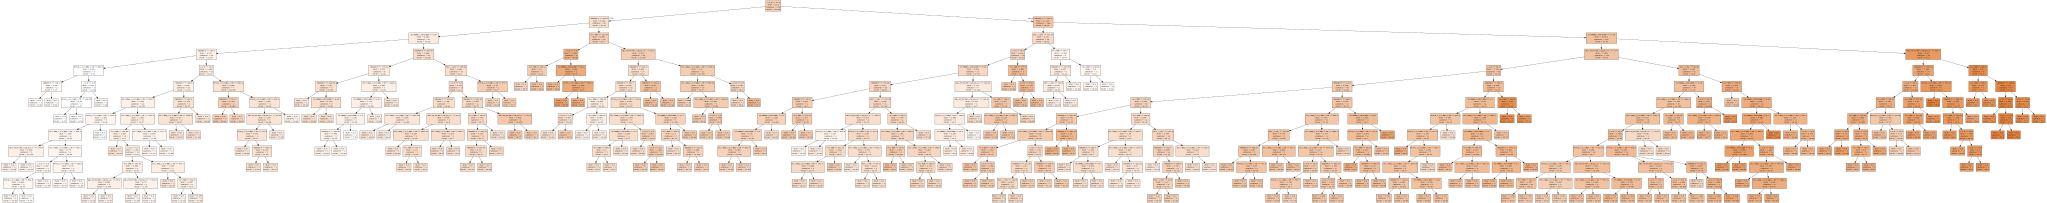

In [37]:
v_feature_names = df1_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file='rfr_final_0.dot', feature_names = v_feature_names, impurity = True, filled = True)
with open('rfr_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

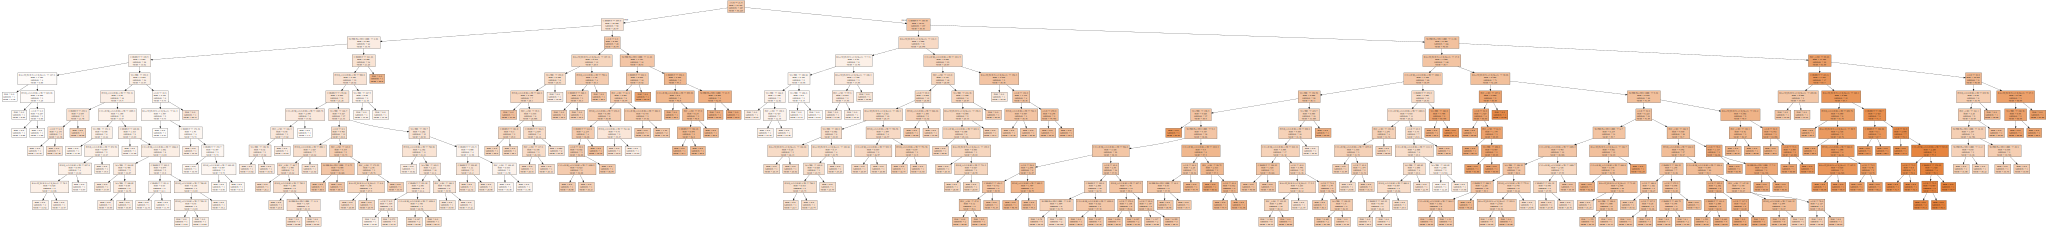

In [38]:
v_feature_names = df1_train_x.columns
export_graphviz(rf_final.estimators_[1], out_file='rfr_final_1.dot', feature_names = v_feature_names, impurity = True, filled = True)
with open('rfr_final_1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

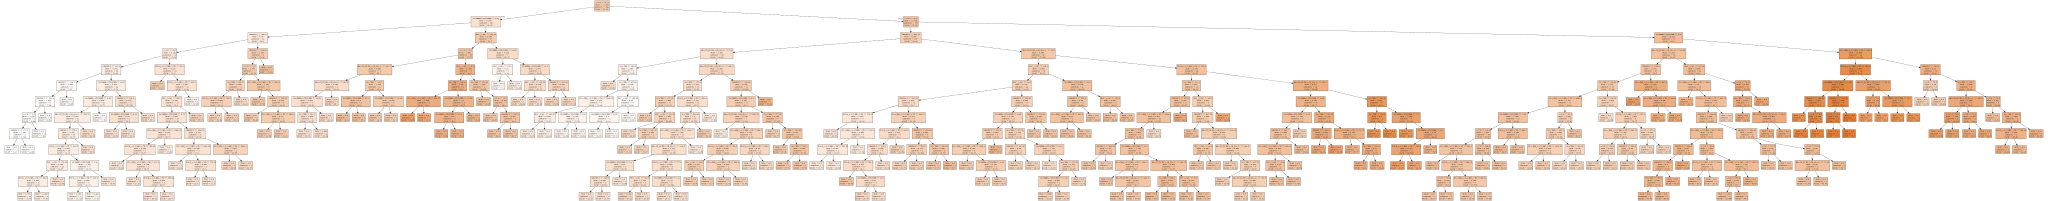

In [39]:
v_feature_names = df1_train_x.columns
export_graphviz(rf_final.estimators_[10], out_file='rfr_final_10.dot', feature_names = v_feature_names, impurity = True, filled = True)
with open('rfr_final_10.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [40]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Feature  Importance
7                 AGE       0.259
0              CEMENT       0.236
3               WATER       0.122
1  BLAST_FURNACE_SLAG       0.095
4    SUPERPLASTICIZER       0.094
5    COARSE_AGGREGATE       0.078
6      FINE_AGGREGATE       0.077
2             FLY_ASH       0.039

Text(0, 0.5, '변수')

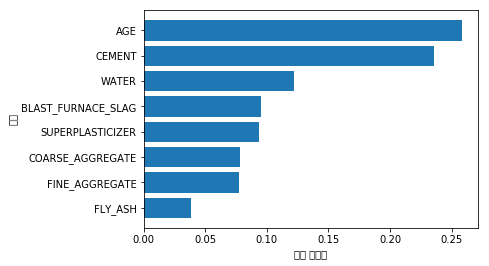

In [41]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [43]:
estimator = RandomForestRegressor(random_state=777)
para_depth = para_depths
para_split = para_splits
para_leaf = para_leaves

param_grid = {'criterion':['mae'], 'max_features':['auto', 'sqrt', 'log2'],
             'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs = -1)
grid_dt.fit(df1_train_x, df1_train_y)

print(f'best score: {grid_dt.best_score_.round(3)}')

KeyboardInterrupt: 

# 문제 4

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
gb_uncustomized = GradientBoostingRegressor(random_state = 777)
gb_uncustomized.fit(df1_train_x, df1_train_y)
print(f'Score on training set: {gb_uncustomized.score(df1_train_x, df1_train_y)}')
print(f'Score on test set: {gb_uncustomized.score(df1_test_x, df1_test_y)}')

Score on training set: 0.9607454978826807
Score on test set: 0.8628631009587868


In [ ]:
train_score = list()
test_score = list()

para_n_tree = [n_tree * 10 for n_tree in range(1, 20)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators= v_n_estimators, random_state = 777)
    gb.fit(df1_train_x, df1_train_y)
    train_score.append(gb.score(df1_train_x, df1_train_y))
    test_score.append(gb.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Estimators'] = para_n_tree
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score

In [ ]:
df_score.round(3)

In [ ]:
plt.plot(para_n_tree, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.ylabel('Score')
plt.xlabel('N_Estimators')
plt.legend()

# 트리의 숫자가 많아짐에 따라서 train과 test 스코어 모두 처음에는 급격히, 하지만 서서히 증가폭이 줄어드는 모습을 확인 할 수 있다. 하지만 Gradient Boosting의 과적합을 막기위해서 무조건 높은 수치로 설정하는 것을 지양하고, 해당 그래프에서 상승폭이 확연히 줄어드는 50으로 n_estimator를 설정할 것이다.

In [ ]:
train_score = list()
test_score = list()

para_lr = [lr * 0.1 for lr in range(1, 11)]

for lr in para_lr:
    gb = GradientBoostingRegressor(n_estimators= 50, random_state = 777, learning_rate=lr)
    gb.fit(df1_train_x, df1_train_y)
    train_score.append(gb.score(df1_train_x, df1_train_y))
    test_score.append(gb.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['LearningRate'] = para_lr
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score
df_score.round(3)

In [ ]:
plt.plot(para_lr, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle='--', label = 'Test Score')
plt.ylabel('Score')
plt.xlabel('LearningRate')
plt.legend()

# Test score에서 증가에서 감소로 그래프가 변하기 전인 lr = 0.3으로 설정한다.

In [ ]:
train_score = list()
test_score = list()

para_leaf = [leaf for leaf in range(1, 21)]

for leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators= 50, random_state = 777, learning_rate=0.3, min_samples_leaf=leaf)
    gb.fit(df1_train_x, df1_train_y)
    train_score.append(gb.score(df1_train_x, df1_train_y))
    test_score.append(gb.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Leaf'] = para_leaf
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score
df_score.round(3)

In [ ]:
plt.plot(para_leaf, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.ylabel('Score')
plt.xlabel('Leaf')
plt.legend()

# TrainScore도 최고점에 가깝고, TestScore도 하강하기 전인 leaf == 3을 설정한다

In [ ]:
train_score = list()
test_score = list()

para_split = [split * 2 for split in range(1, 11)]

for split in para_split:
    gb = GradientBoostingRegressor(n_estimators= 50, random_state = 777, learning_rate=0.3, min_samples_leaf=3, min_samples_split=split)
    gb.fit(df1_train_x, df1_train_y)
    train_score.append(gb.score(df1_train_x, df1_train_y))
    test_score.append(gb.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Split'] = para_split
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score
df_score.round(3)

In [ ]:
plt.plot(para_split, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.ylabel('Score')
plt.xlabel('Split')
plt.legend()

# Split이 높아질수록 train과 test 스코어 모두 낮아지는 모습을 보인다. 하지만 과적합을 방지하는 장치로써, 최고의 성능을 보여주는 split 개수 중 가장 큰 수인 8을 설정한다.

In [ ]:
train_score = list()
test_score = list()

para_depth = [depth for depth in range(1, 11)]

for depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators= 50, random_state = 777, learning_rate=0.3, min_samples_leaf=3, min_samples_split=8, max_depth=depth)
    gb.fit(df1_train_x, df1_train_y)
    train_score.append(gb.score(df1_train_x, df1_train_y))
    test_score.append(gb.score(df1_validation_x, df1_validation_y))

df_score = pd.DataFrame()
df_score['Depth'] = para_depth
df_score['TrainScore'] = train_score
df_score['ValidationScore'] = test_score
df_score.round(3)

In [ ]:
plt.plot(para_depth, train_score, linestyle='-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.ylabel('Score')
plt.xlabel('Depth')
plt.legend()

# Test score가 최고값을 보이는 3으로 설정한다.

In [ ]:
fin_gb = GradientBoostingRegressor(n_estimators= 50, random_state = 777, learning_rate=0.3, min_samples_leaf=3, min_samples_split=8, max_depth=3, criterion='mse')
fin_gb.fit(df1_train_x, df1_train_y)
print('Train Score')
print(fin_gb.score(df1_train_x, df1_train_y))
print('Test Score')
print(fin_gb.score(df1_validation_x, df1_validation_y))
fin_gb

In [ ]:
pred_y = fin_gb.predict(df1_test_x)
print(f'MSE: {mean_squared_error(pred_y, df1_test_y)}')
print(f'MAEL {mean_absolute_error(pred_y, df1_test_y)}')

In [ ]:
fin_gb = GradientBoostingRegressor(n_estimators= 50, random_state = 777, learning_rate=0.3, min_samples_leaf=3, min_samples_split=8, max_depth=3, criterion='mae')
fin_gb.fit(df1_train_x, df1_train_y)
print('Train Score')
print(fin_gb.score(df1_train_x, df1_train_y))
print('Test Score')
print(fin_gb.score(df1_validation_x, df1_validation_y))
fin_gb

In [ ]:
pred_y = fin_gb.predict(df1_test_x)
print(f'MSE: {mean_squared_error(pred_y, df1_test_y)}')
print(f'MAEL {mean_absolute_error(pred_y, df1_test_y)}')

In [ ]:
v_feature_names = df1_train_x.columns
export_graphviz(fin_gb.estimators_[-1][-1], out_file='gb_final.dot', feature_names = v_feature_names, impurity = True, filled = True)
with open('rfr_final_10.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 해당 모델에서는 MSE가 더 나은 성능을 보여준다. 낮은 에러, 높은 스코어로 알 수 있다.

# 문제 5

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [7]:
df = pd.read_csv('유방암.csv')
df_y = df['diagnosis']
df_x = df.drop('diagnosis', axis = 1)
print(df_y.shape, df_x.shape)

(569,) (569, 30)


In [8]:
df_train_x, df_test_x, df_train_y, df_test_y= train_test_split(df_x, df_y, test_size = 0.3, random_state = 777)
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y, test_size = 3/7, random_state = 777)

In [ ]:
tree_uncustomized = DecisionTreeClassifier(random_state=777)
tree_uncustomized.fit(df_train_x, df_train_y)
print(f'Training score: {tree_uncustomized.score(df_train_x, df_train_y)}')
print(f'Test score: {tree_uncustomized.score(df_test_x, df_test_y)}')

In [ ]:
tree_uncustomized

# 파라미터가 설정되지 않은 tree는 과적합되어서 높은 스코어를 보이는 것으로 예상됨, 파라미터를 설정해야함

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_depth = [depth for depth in range(1, 11)]

for depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 777, max_depth=depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_validation_x, df_validation_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy['Depth'] = para_depth
df_accuracy.round(3)

In [ ]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

 # Depth == 2에서 Test Score의 수치가 가장 높은 것을 알 수 있다. Train Score는 <u>상대적</u>으로 낮지만 절대적으로 0.95는 충분히 유의미하다고 생각된다. Depth == 2 가 과적합을 막아줄 것으로 예상된다

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_split = [split * 2 for split in range(1, 15)]

for split in para_split:
    tree = DecisionTreeClassifier(random_state = 777, max_depth=2, min_samples_split=split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_validation_x, df_validation_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['Split'] = para_split
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy.round(3)

In [ ]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('Split')
plt.ylabel('Accuracy')
plt.legend()

# Split을 어느 값을 주더라도 Train과 Test score 모두 동일한 수치를 보인다. 이는 Depth ==2 때문으로 생각된다. (최대 깊이가 많이 얕아서 Split을 늘리거나 줄이더라도 유의미한 변화가 없음) 그렇다면 따로 Split값을 설정하지 않아도 될 것으로 보인다. 

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_leaf = [leaf * 10 for leaf in range(1, 15)]

for leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 777, max_depth=2, min_samples_leaf=leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_validation_x, df_validation_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['Leaf'] = para_leaf
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy.round(3)

In [ ]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('Leaf')
plt.ylabel('Accuracy')
plt.legend()

# leaf가 10일때와 110일때 급격한 기울기 변화를 보인다. 잎사귀 노드의 최소 데이터수를 10으로 설정하는 것은 너무 적다고 생각되지만, 현재 모델은 Depth를 2로 설정해두었기 때문에 잎사귀 노드의 자료의 개수를 10으로 해도 과적합을 상쇄할 것으로 예상된다. 따라서 leaf == 10

In [ ]:
tree_final = DecisionTreeClassifier(random_state=777, min_samples_leaf=10, max_depth=2)
tree_final.fit(df_train_x, df_train_y)

tree_final

In [ ]:
export_graphviz(tree_final, out_file = 'tree_final.dot', class_names=['0', '1'], feature_names = df_x.columns, impurity = True, filled = True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
y_pred = tree_final.predict(df_test_x)
print(f'Accuracy: {tree_final.score(df_test_x, df_test_y)}')
print(f'ConfusionMatrix:\n{confusion_matrix(df_test_y, y_pred)}')

In [ ]:
df_importance = pd.DataFrame()
df_importance['Feature'] = df_x.columns
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

In [ ]:
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Parameter Importance')
plt.ylabel('Parameter')

# worst perimeter, mean concave points, mean concativity 세 인자가 목표 변수에 영향을 주는 것으로 나타남

In [ ]:
fr_uncustomized = RandomForestClassifier(random_state=777)
fr_uncustomized.fit(df_train_x, df_train_y)
print(f'Training score: {fr_uncustomized.score(df_train_x, df_train_y)}')
print(f'Test score: {fr_uncustomized.score(df_test_x, df_test_y)}')

In [ ]:
fr_uncustomized

# 여러 트리를 통해서 최적의 결과를 도출하기 때문에, uncustomized도 높은 스코어를 보임

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_tree = [tree * 10 for tree in range(1, 11)]

for tree in para_tree:
    fr = RandomForestClassifier(random_state = 777, n_estimators=tree)
    fr.fit(df_train_x, df_train_y)
    train_accuracy.append(fr.score(df_train_x, df_train_y))
    test_accuracy.append(fr.score(df_validation_x, df_validation_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy['Tree'] = para_tree
df_accuracy.round(3)

In [ ]:
plt.plot(para_tree, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_tree, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.legend()

# oob test

In [ ]:
oob_error = list()

for tree in range(1, 151):
    rf = RandomForestClassifier(n_estimators=tree, oob_score = True, random_state=777)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

In [ ]:
plt.plot(range(1,151), oob_error)
plt.ylabel('oob_error')
plt.xlabel('trees')

# 트리의 개수가 늘어날 수록 oob 오차는 줄어든다. 0~10에서 oob는 크게 줄어들고 10이후 편차는 약 2.5%이므로 tree >= 10이면 어떤 수가 오더라도 큰 차이는 없을 것으로 생각되므로 스코어가 높은 tree == 30으로 설정한다.

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_depth = [depth for depth in range(1, 11)]

for depth in para_depth:
    fr = RandomForestClassifier(random_state = 777, n_estimators=30, max_depth=depth)
    fr.fit(df_train_x, df_train_y)
    train_accuracy.append(fr.score(df_train_x, df_train_y))
    test_accuracy.append(fr.score(df_validation_x, df_validation_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy['Depth'] = para_depth
df_accuracy.round(3)

In [ ]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

# depth == 2에서 기울기는 -가 되지만 training score는 계속 상승하며 depth == 4에서 test, train 스코어 모두 높은 수치를 보이므로 depth == 4로 설정한다.

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_split = [split*2 for split in range(1, 16)]

for split in para_split:
    fr = RandomForestClassifier(random_state = 777, n_estimators=30, max_depth=4, min_samples_split=split)
    fr.fit(df_train_x, df_train_y)
    train_accuracy.append(fr.score(df_train_x, df_train_y))
    test_accuracy.append(fr.score(df_validation_x, df_validation_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy['Split'] = para_split
df_accuracy.round(3)

In [ ]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('Split')
plt.ylabel('Accuracy')
plt.legend()

# 해당 그래프에서 split이 늘어날수록 Accuracy가 감소하지만, split을 무작정 작게한다면 과적합이 우려되어 테스트 스코어가 높아지는 split == 8을 설정한다.

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_leaf = [leaf * 10 for leaf in range(1, 11)]

for leaf in para_leaf:
    fr = RandomForestClassifier(random_state = 777, n_estimators=30, max_depth=4, min_samples_leaf=leaf, min_samples_split=8)
    fr.fit(df_train_x, df_train_y)
    train_accuracy.append(fr.score(df_train_x, df_train_y))
    test_accuracy.append(fr.score(df_validation_x, df_validation_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy['Leaf'] = para_leaf
df_accuracy.round(3)

In [ ]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.xlabel('Leaf')
plt.ylabel('Accuracy')
plt.legend()

# 위의 split과 같은 원리로 잎사귀 수를 제한한다. 50 >= leaf에서 큰 변화는 없으므로 임의의 leaf를 선택해야한다. 최소 잎사귀 노드의 자료 수가 많아질수록 정확도는 줄어들지만 과적합을 막을 수 있다. 임의로 leaf == 40으로 설정한다.

In [ ]:
fin_fr = RandomForestClassifier(n_estimators=30, max_depth=4, min_samples_split=8, min_samples_leaf=40, random_state=777)
fin_fr.fit(df_train_x, df_train_y)
y_pred = fin_fr.predict(df_test_x)

print(f'Accuracy on training set: {fin_fr.score(df_train_x, df_train_y)}')
print(f'Accuracy on test set: {fin_fr.score(df_test_x, df_test_y)}')
print(f'Confusion Matrix:\n{confusion_matrix(df_test_y, y_pred)}')

In [ ]:
df_importance = pd.DataFrame()
df_importance['Feature'] = df_train_x.columns
df_importance['Importance'] = fin_fr.feature_importances_
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

In [ ]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Parameter Importance')
plt.ylabel('Parameter')

# Decision Tree와는 다르게 mean concave points, worst area, worst per meter... 등이 순서대로 가장 유의한 변수로 보인다

# 문제 7

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
svm_uncustomized = SVC(random_state=777)
svm_uncustomized.fit(df_train_x, df_train_y)
print(f'Accuracy on training set : {svm_uncustomized.score(df_train_x, df_train_y)}')
print(f'Accuracy on test set : {svm_uncustomized.score(df_test_x, df_test_y)}')
svm_uncustomized

# 파라미터를 설정하지 않은 SVM의 스코어는 0.667에 머무른다. 다른 분석 방식과 비교했을 때, 비교적 낮은 점수를 보인다

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_c = [10 ** c for c in range(-2, 2)]

for c in para_c:
    svm = SVC(random_state=777, C = c)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_validation_x, df_validation_y))
df_accuracy = pd.DataFrame()
df_accuracy['C'] = para_c
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy.round(3)

In [ ]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend()

# c >= 0.1 이상의 어느 점에서 모델의 training score는 1로 과적합한다. 따라서 임의로 c == 0.1로 설정한다

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_gamma = [10 ** gamma for gamma in range(-2, 2)]

for gamma in para_gamma:
    svm = SVC(random_state=777, C = 0.1, gamma=gamma)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_validation_x, df_validation_y))
df_accuracy = pd.DataFrame()
df_accuracy['Gamma'] = para_gamma
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy.round(3)

In [ ]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Gamma')
plt.legend()

# Gamma 값의 변화에 따른 스코어의 변화는 관찰할 수 없다. 따라서 설정하지 않아도 될 것으로 보인다

In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = df_train_x.columns)
df_scaled.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   worst concave points  worst symmetry  worst fractal dimension  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

In [18]:
df_scaled_train_x, df_scaled_test_x, df_new_train_y, df_new_test_y = train_test_split(df_scaled, df_y, test_size = 0.3, random_state = 777)

svm_fin = SVC(random_state=777, C = 0.1)
svm_fin.fit(df_scaled_train_x, df_new_train_y)

print(f'Accuracy on training set: {svm_fin.score(df_scaled_train_x, df_new_train_y)}')
print(f'Accuracy on test set: {svm_fin.score(df_scaled_test_x, df_new_test_y)}')

Accuracy on training set: 0.9522613065326633
Accuracy on test set: 0.9649122807017544


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Scale 과정을 거치자 스코어가 급격히 증가한 것을 알 수 있다. 이제 Scale된 데이터를 가지고 다시 모델을 생성한다.

In [19]:
df_scaled_train_x, df_scaled_validation_x, df_scaled_train_y, df_scaled_validation_y = train_test_split(df_scaled_train_x, df_new_train_y, test_size = 3/7, random_state = 777)
df_scaled_test_y = df_new_test_y

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_c = [10 ** c for c in range(-2, 2)]

for c in para_c:
    svm = SVC(random_state=777, C = c)
    svm.fit(df_scaled_train_x, df_scaled_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_scaled_train_y))
    test_accuracy.append(svm.score(df_scaled_validation_x, df_scaled_validation_y))
df_accuracy = pd.DataFrame()
df_accuracy['C'] = para_c
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy.round(3)

In [ ]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'TrainAccuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'TestAccuracy')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend()

# 0.01~0.1에서 스코어는 수직 상승하고, 0.1~1.0에서 완만히 증가, 이후에는 0.0n% 증가한다. 따라서 C는 임의로 1로 설정한다/

In [ ]:
train_accuracy = list()
test_accuracy = list()

para_gamma = [10 ** gamma for gamma in range(-2, 2)]

for gamma in para_gamma:
    svm = SVC(random_state=777, C = 1, gamma = gamma)
    svm.fit(df_scaled_train_x, df_scaled_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_scaled_train_y))
    test_accuracy.append(svm.score(df_scaled_validation_x, df_scaled_validation_y))
df_accuracy = pd.DataFrame()
df_accuracy['Gamma'] = para_gamma
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy
df_accuracy.round(3)

In [ ]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'TrainAccuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'TestAccuracy')
plt.ylabel('Accuracy')
plt.xlabel('Gamma')
plt.legend()

# Gamma >= 1에서 train score는 과적합을 보여주며, test score 역시 0.1 이후 급격히 하락한다. 따라서 gamma 값을 임의로 0.1로 설정한다.

In [ ]:
svc_fin = SVC(gamma=0.1, C = 1, random_state=777)
svc_fin.fit(df_scaled_train_x, df_scaled_train_y)
y_pred = svc_fin.predict(df_scaled_test_x)

print(f'Accuracy on training set: {svc_fin.score(df_scaled_train_x, df_scaled_train_y)}')
print(f'Accuracy on test set: {svc_fin.score(df_scaled_test_x, df_scaled_test_y)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_pred, df_scaled_test_y)}')

# 문제 8

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df_x.columns

# KNN에서는 범주형 설명 변수가 있을경우 pd.get_dummies를 이용하여 파라미터를 분류해야하지만, 해당 모델의 경우 모든 설명변수가 연속형이므로 해당 과정을 생략한다.

In [ ]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print(f'Accuracy on training :{knn_uncustomized.score(df_train_x, df_train_y)}')
print(f'Accuracy on test :{knn_uncustomized.score(df_validation_x, df_validation_y)}')

# 따로 설정하지 않은 모델도 높은 정확도를 보여주지만, 좀 더 높은 정확성과 모델에 대한 설명을 위해 새로운 모델을 제작한다.

In [ ]:
train_accuracy = list()
test_accuracy = list()
para_neighbor = [neighbor for neighbor in range(3, 31)]

for neighbor in para_neighbor:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_validation_x, df_validation_y))

df_accuracy = pd.DataFrame()
df_accuracy['Neighbor'] = para_neighbor
df_accuracy['TrainScore'] = train_accuracy
df_accuracy['TestScore'] = test_accuracy
df_accuracy.round(3)

In [ ]:
plt.plot(para_neighbor, train_accuracy, linestyle = '-', label = 'TrainAccuracy')
plt.plot(para_neighbor, test_accuracy, linestyle = '--', label = 'TestAccuracy')
plt.ylabel('Accuracy')
plt.xlabel('Neighbor')
plt.legend()

# 이웃의 수가 증가함에따라 train과 test 스코어 모두 대체적으로 감소하는 경향을 보인다. test가 최고점에 있고, train 역시 (감소중이지만) 아직 높은 점에 있는 n_neighbors == 4로 설정한다.

In [ ]:
train_accuracy = list()
test_accuracy = list()
para_neighbor = [neighbor for neighbor in range(3, 31)] * 2

para_weights = ['uniform'] * 28 + ['distance'] * 28

for neighbor, weight in zip(para_neighbor, para_weights):
    knn = KNeighborsClassifier(n_neighbors=neighbor, weights=weight)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_validation_x, df_validation_y))

df_accuracy = pd.DataFrame()
df_accuracy['Neighbor'] = para_neighbor
df_accuracy['Weight'] = para_weights
df_accuracy['TrainScore'] = train_accuracy
df_accuracy['TestScore'] = test_accuracy
df_accuracy.round(3)

In [ ]:
df_accuracy_pivot = df_accuracy.pivot(index = 'Neighbor', columns = 'Weight', values = ['TrainScore', 'TestScore'])
df_accuracy_pivot

In [ ]:
level0 = df_accuracy_pivot.columns.get_level_values(0)
level1 = df_accuracy_pivot.columns.get_level_values(1)
df_accuracy_pivot.columns = level0 + '_' + level1
df_accuracy_pivot.head()

In [11]:
import seaborn as sns

In [ ]:
sns.lineplot(data = df_accuracy_pivot)

# 과적합을 피하기위해서 weight는 uniform으로 설정한다.

In [ ]:
train_accuracy = list()
test_accuracy = list()
para_neighbor = [neighbor for neighbor in range(3, 31)] * 3

para_metric = ['minkowski'] * 28 + ['euclidean'] * 28 + ['manhattan'] * 28

for neighbor, metric in zip(para_neighbor, para_metric):
    knn = KNeighborsClassifier(n_neighbors=neighbor, weights='uniform', metric=metric)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_validation_x, df_validation_y))

df_accuracy = pd.DataFrame()
df_accuracy['Neighbor'] = para_neighbor
df_accuracy['Metric'] = para_metric
df_accuracy['TrainScore'] = train_accuracy
df_accuracy['TestScore'] = test_accuracy
df_accuracy.round(3)

In [ ]:
df_accuracy_pivot = df_accuracy.pivot(index = 'Neighbor', columns = 'Metric', values = ['TrainScore', 'TestScore'])
level0 = df_accuracy_pivot.columns.get_level_values(0)
level1 = df_accuracy_pivot.columns.get_level_values(1)
df_accuracy_pivot.columns = level0 + '_' + level1
sns.lineplot(data = df_accuracy_pivot)

# manhattan이 test와 train 모두에서 비교적 높은 수치를 보이는 것을 알 수 있다. metrics = 'manhattan'으로 설정

In [ ]:
knn_fin = KNeighborsClassifier(n_neighbors=4, weights='uniform', metric='manhattan')
knn_fin.fit(df_train_x, df_train_y)
y_pred = knn_fin.predict(df_test_x)
print(f'Accuracy on training data: {knn_fin.score(df_train_x, df_train_y)}')
print(f'Accuracy on test data: {knn_fin.score(df_test_x, df_test_y)}')
print(f'Confusion matrix:\n{confusion_matrix(df_test_y, y_pred)}')

# 문제9

In [12]:
from sklearn.decomposition import PCA
import statsmodels.api as sm

# 이미 위에서 Scale 변환시켰으므로 여기서는 Scale을 생략한다.

In [20]:
len(df_scaled_train_x.columns)

30

In [26]:
pca = PCA(n_components=10)
nd_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(nd_pca, columns = ['Prin' + str(num) for num in range(1, 11)])
df_pca.head()
print(len(df_pca))

569


In [27]:
x_cols = pd.DataFrame({'Feature':df_scaled_train_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, columns = ['Prin' + str(num) for num in range(1, 11)])], axis = 1)
df_eigenvector.round(3)

Feature  Prin1  Prin2  Prin3  Prin4  Prin5  Prin6  Prin7  \
0               mean radius -0.219  0.234  0.009 -0.041 -0.038 -0.019  0.124   
1              mean texture -0.104  0.060 -0.065  0.603  0.049  0.032 -0.011   
2            mean perimeter -0.228  0.215  0.009 -0.042 -0.037 -0.017  0.114   
3                 mean area -0.221  0.231 -0.029 -0.053 -0.010  0.002  0.052   
4           mean smoothness -0.143 -0.186  0.104 -0.159  0.365  0.286  0.141   
5          mean compactness -0.239 -0.152  0.074 -0.032 -0.012  0.014 -0.031   
6            mean concavity -0.258 -0.060 -0.003 -0.019 -0.086  0.009  0.108   
7       mean concave points -0.261  0.035  0.026 -0.065  0.044  0.052  0.150   
8             mean symmetry -0.138 -0.190  0.040 -0.067  0.306 -0.356  0.094   
9    mean fractal dimension -0.064 -0.367  0.023 -0.049  0.044  0.119 -0.296   
10             radius error -0.206  0.106 -0.268 -0.098  0.154  0.026 -0.312   
11            texture error -0.017 -0.090 -0.375  0.360  0.192  0.029  0.091   
12          perimeter error -0.211  0.089 -0.267 -0.089  0.121 -0.002 -0.315   
13               area error -0.203  0.152 -0.216 -0.108  0.128  0.043 -0.347   
14         smoothness error -0.015 -0.204 -0.309 -0.045  0.232  0.343  0.244   
15        compactness error -0.170 -0.233 -0.155  0.027 -0.280 -0.069 -0.023   
16          concavity error -0.154 -0.197 -0.176 -0.001 -0.354 -0.056  0.209   
17     concave points error -0.183 -0.130 -0.225 -0.074 -0.196  0.031  0.370   
18           symmetry error -0.042 -0.184 -0.289 -0.044  0.253 -0.490  0.080   
19  fractal dimension error -0.103 -0.280 -0.212 -0.015 -0.263  0.053 -0.191   
20             worst radius -0.228  0.220  0.048 -0.015  0.004  0.000  0.010   
21            worst texture -0.104  0.045  0.042  0.633  0.093  0.050 -0.010   
22          worst perimeter -0.237  0.200  0.049 -0.014 -0.007 -0.009  0.000   
23               worst area -0.225  0.219  0.012 -0.026  0.027  0.025 -0.068   
24         worst smoothness -0.128 -0.172  0.260 -0.018  0.324  0.369  0.109   
25        worst compactness -0.210 -0.144  0.236  0.091 -0.122 -0.048 -0.140   
26          worst concavity -0.229 -0.098  0.173  0.074 -0.189 -0.028  0.060   
27     worst concave points -0.251  0.008  0.170 -0.006 -0.043  0.031  0.168   
28           worst symmetry -0.123 -0.142  0.271  0.036  0.245 -0.499  0.018   
29  worst fractal dimension -0.132 -0.275  0.233  0.077 -0.094  0.080 -0.375   

    Prin8  Prin9  Prin10  
0   0.007  0.223  -0.095  
1  -0.131 -0.113  -0.241  
2   0.019  0.224  -0.086  
3  -0.035  0.196  -0.075  
4   0.289 -0.006   0.069  
5   0.151  0.168  -0.013  
6   0.073 -0.041   0.136  
7   0.152  0.112  -0.008  
8   0.232 -0.256  -0.572  
9   0.177  0.124  -0.081  
10 -0.023 -0.250   0.050  
11  0.475  0.247   0.289  
12  0.012 -0.227   0.115  
13 -0.086 -0.229   0.092  
14 -0.573  0.142  -0.161  
15 -0.117  0.145  -0.044  
16 -0.061 -0.358   0.141  
17  0.108 -0.273  -0.086  
18 -0.220  0.304   0.317  
19 -0.011  0.214  -0.368  
20 -0.043  0.112  -0.077  
21 -0.036 -0.103  -0.030  
22 -0.031  0.110  -0.051  
23 -0.079  0.081  -0.070  
24 -0.206 -0.112   0.128  
25 -0.084  0.101   0.172  
26 -0.072 -0.162   0.312  
27  0.036 -0.060   0.077  
28 -0.228 -0.065   0.030  
29 -0.048  0.134  -0.013

In [103]:
df_scaled.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   worst concave points  worst symmetry  worst fractal dimension  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

In [104]:
data = np.array(df_eigenvector['Prin1']) * np.array(df_scaled.iloc[:])
data = list(map(sum, data))
len(data)

569

In [105]:
np.array(df_eigenvector['Prin1']) * np.array(df_scaled.iloc[1])

array([-4.00552203e-01,  3.66803724e-02, -3.83617571e-01, -4.21814953e-01,
        1.17916323e-01,  1.16549118e-01,  6.16178046e-03, -1.42985463e-01,
       -1.92378603e-04,  5.59093790e-02, -1.02835851e-01,  1.52711982e-02,
       -5.56478124e-02, -1.50610813e-01,  8.79662687e-03,  1.18070099e-01,
        6.76993164e-02, -4.77182492e-02,  3.42303699e-02,  1.01997776e-02,
       -4.11745378e-01,  3.85704115e-02, -3.63271725e-01, -4.25115266e-01,
        4.80605119e-02,  9.04345570e-02,  3.35713994e-02, -2.72734199e-01,
        2.99751514e-02, -3.70563251e-02])

In [106]:
new_df = pd.DataFrame()
for prin in df_eigenvector.columns[1:12]:
    data = np.array(df_eigenvector[prin]) * np.array(df_scaled.iloc[:])
    data = list(map(sum, data))
    new_df[prin] = data
    
new_df.head()

Prin1      Prin2     Prin3     Prin4     Prin5     Prin6     Prin7  \
0 -9.192837  -1.948583  1.123166 -3.633731  1.195110 -1.411424 -2.159370   
1 -2.387802   3.768172  0.529293 -1.118264 -0.621775 -0.028656 -0.013358   
2 -5.733896   1.075174  0.551748 -0.912083  0.177086 -0.541452  0.668166   
3 -7.122953 -10.275589  3.232790 -0.152547  2.960878 -3.053422 -1.429911   
4 -3.935302   1.948072 -1.389767 -2.940639 -0.546747  1.226495  0.936213   

      Prin8     Prin9    Prin10    Prin11  
0  0.398407  0.157118  0.877402 -0.262955  
1 -0.240988  0.711905 -1.106995 -0.813120  
2 -0.097374 -0.024066 -0.454275  0.605604  
3 -1.059565  1.405440  1.116975  1.151514  
4 -0.636376  0.263805 -0.377704 -0.651360

In [107]:
target_df = new_df.T
# target_df['prin'] = target_df.index

In [108]:
target_df

0         1         2          3         4         5         6    \
Prin1  -9.192837 -2.387802 -5.733896  -7.122953 -3.935302 -2.380247 -2.238883   
Prin2  -1.948583  3.768172  1.075174 -10.275589  1.948072 -3.949929  2.690031   
Prin3   1.123166  0.529293  0.551748   3.232790 -1.389767  2.934877  1.639913   
Prin4  -3.633731 -1.118264 -0.912083  -0.152547 -2.940639 -0.941037 -0.149340   
Prin5   1.195110 -0.621775  0.177086   2.960878 -0.546747  1.056042 -0.040360   
Prin6  -1.411424 -0.028656 -0.541452  -3.053422  1.226495  0.451039  0.128948   
Prin7  -2.159370 -0.013358  0.668166  -1.429911  0.936213 -0.490445  0.301567   
Prin8   0.398407 -0.240988 -0.097374  -1.059565 -0.636376  0.165444 -0.083698   
Prin9   0.157118  0.711905 -0.024066   1.405440  0.263805  0.133473  0.080025   
Prin10  0.877402 -1.106995 -0.454275   1.116975 -0.377704  0.530431 -0.219143   
Prin11 -0.262955 -0.813120  0.605604   1.151514 -0.651360 -0.109766 -0.393690   

             7         8         9    ...       559       560       561  \
Prin1  -2.143299 -3.174924 -6.351747  ...  1.089376  0.481771  4.870310   
Prin2  -2.340244 -3.391813 -7.727174  ... -1.292848  0.178020  2.131106   
Prin3   0.871947  3.119986  4.341916  ... -1.429379 -1.032108 -3.414189   
Prin4   0.127043  0.601297  3.375202  ...  3.372136  2.010280  5.133988   
Prin5   1.427437  1.522290 -1.710263  ... -0.947342 -0.327103  0.488921   
Prin6   1.257039 -0.559545  0.723909  ...  1.725870  0.992062  1.110792   
Prin7  -0.974100  0.215104 -2.519840  ...  0.353975  0.048546 -0.488371   
Prin8   0.653338  0.687341 -0.365149  ...  1.164340  0.195221  1.289284   
Prin9  -0.248184 -0.511924  0.717397  ...  0.207495  0.325865  1.390479   
Prin10 -1.000586 -0.029187  1.165631  ...  1.391708 -0.429072  1.746663   
Prin11  0.196487  0.560514 -0.549038  ... -0.645765  1.317061 -0.570247   

             562       563       564       565       566        567       568  
Prin1  -5.917613 -8.741338 -6.439315 -3.793382 -1.256179 -10.374794  5.475243  
Prin2  -3.482637  0.573855  3.576817  3.584048  1.902297  -1.672010  0.670637  
Prin3   3.262792 -0.897090 -2.459487 -2.088476 -0.562731   1.877029 -1.490443  
Prin4   3.917585 -0.385150 -1.177314  2.506028  2.089227   2.356031  2.299157  
Prin5  -1.716382 -0.679043  0.074824  0.510723 -1.809991   0.033742  0.184703  
Prin6  -1.013599  0.300753  2.375193  0.246710  0.534447  -0.567936 -1.617837  
Prin7  -0.271442 -0.094824  0.596130  0.716326  0.192758  -0.223082 -1.698952  
Prin8  -0.091963  0.734082  0.035471  1.113360 -0.341887   0.280239 -1.046354  
Prin9  -0.372476 -0.831093 -0.987929  0.105207 -0.393917   0.542035 -0.374101  
Prin10  0.630423 -0.450639 -0.256989  0.108632 -0.520877   0.089296  0.047726  
Prin11  0.241622  0.747773  0.062651 -0.244804  0.840512   0.178628  0.144094  

[11 rows x 569 columns]

# 각 주성분별로 주성분 점수를 기록한 데이터 프레임 생성, 주성분의 경우 일정 갯수를 넘어서면 주성분의 설명력이 급격히 떨어지므로 임의로 10개의 주성분만 선택하여 그 데이터를 확인한다.

In [109]:
import itertools
a = [i for i in range(10)]
a = list(itertools.combinations(a, 2))
p, q = a[0]
print(p, q)

0 1


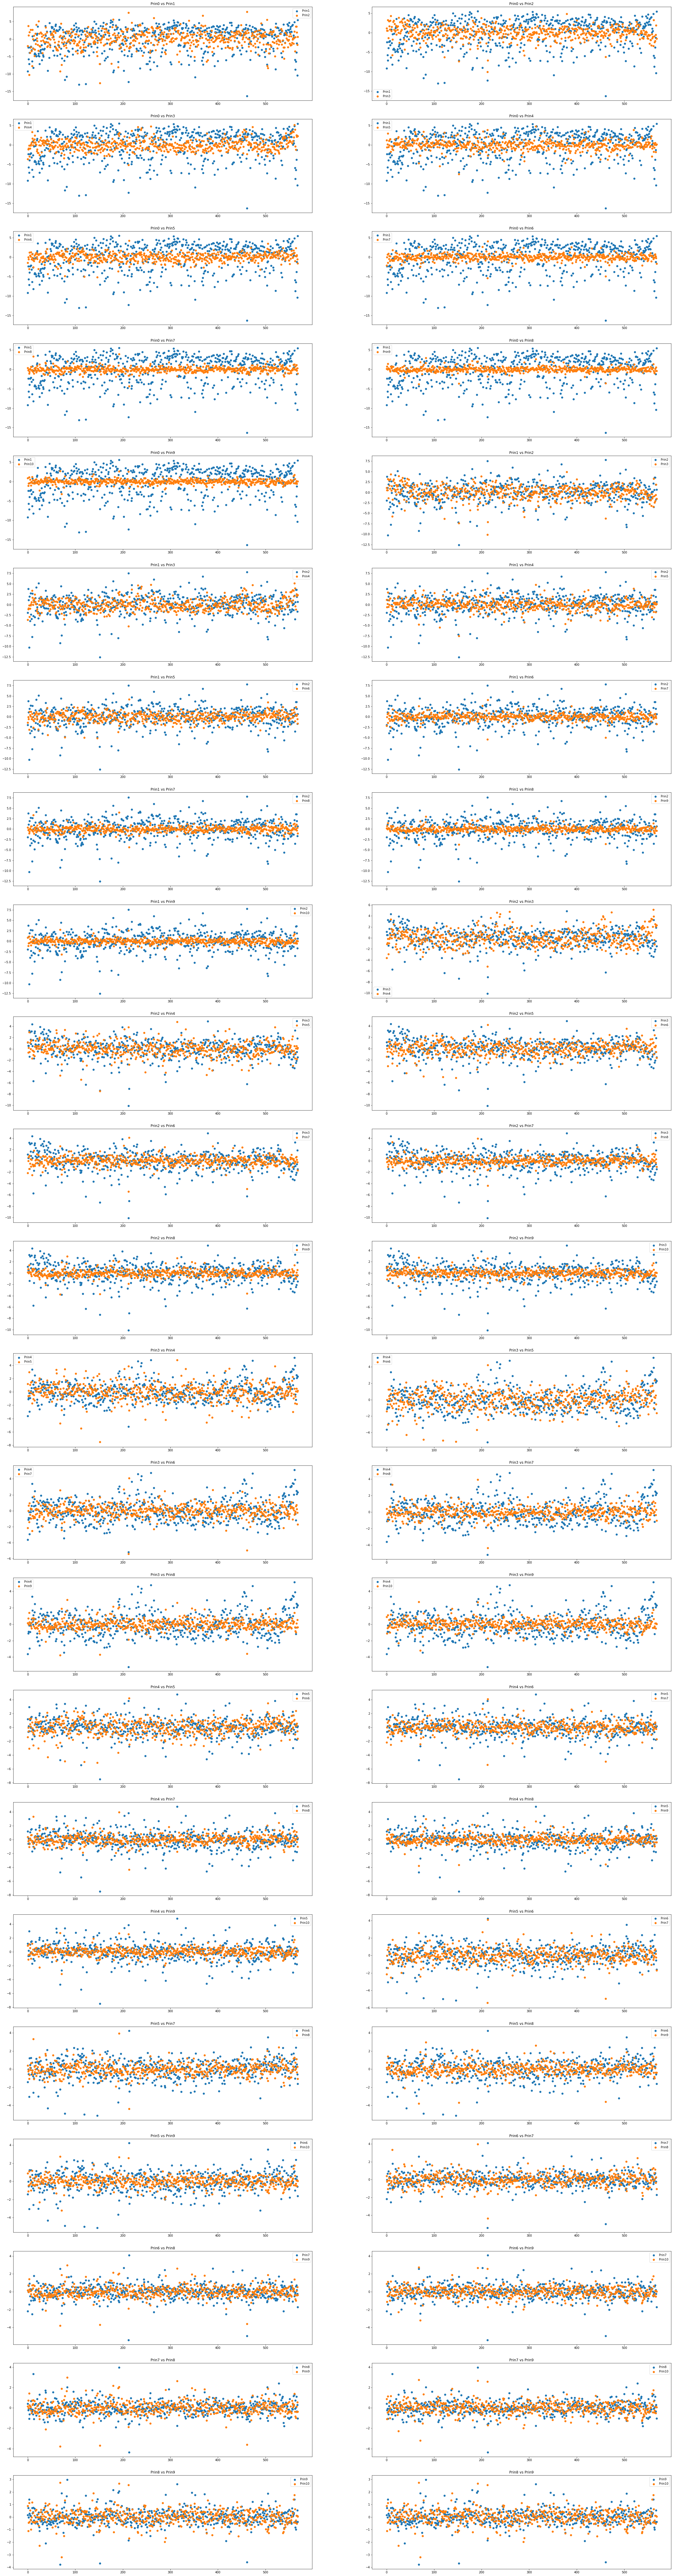

In [111]:
f, axes = plt.subplots(23, 2, figsize = (40,160))
number = 0
for row in range(23):
    for column in range(2):
        if row == 22 and column == 1: break
        p, q = a[number]
        axes[row][column].scatter(x = range(len(target_df.columns)), y = target_df.iloc[p])
        axes[row][column].scatter(x = range(len(target_df.columns)), y = target_df.iloc[q])
        axes[row][column].title.set_text(f'Prin{p} vs Prin{q}')
        axes[row][column].legend()
        if number != 44:
            number += 1


# 주성분은 서로 독립적이므로 산점도를 그려봤을 때도 독립적으로 보이는 것을 알 수 있다.